Take home 1: Ultimate Challenge
===========================

Python Libraries Imported:
======================

In [202]:
# View code for python library imports

import numpy as np
import pandas as pd
from matplotlib.dates import DateFormatter
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots_adjust
import sklearn

import seaborn as sns
import json
from pandas.io.json import json_normalize
#% matplotlib inline
import datetime
plt.style.use('ggplot')

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score

Part 1 ‑ Exploratory data analysis
===========================
* The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [203]:
logins=pd.read_json(r'C:\Users\paro\Desktop\Ultimate_challenge\logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


## Data Structure with info, shape and len methods

In [204]:
# Number of records (Range Index) and fields (Data Columns) in each record with datatypes, and non-null values.
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [205]:
# Count of rows and columns using different pandas methods.

# Using the .shape[index] method
row_count = logins.shape[0] # 0 for row
column_count = logins.shape[1] # 1 for column

print("Number of rows in this dataframe:", row_count)
print("Number of columns in this dataframe:", column_count)

Number of rows in this dataframe: 93142
Number of columns in this dataframe: 1


In [206]:
# Number of rows and columns using the .len(df.axes[index]) method
total_rows=len(logins.axes[0]) # 0 for row
total_cols=len(logins.axes[1]) # 1 for column

print("Number of rows in this dataframe:", total_rows)
print("Number of columns in this dataframe:", total_cols)

Number of rows in this dataframe: 93142
Number of columns in this dataframe: 1


In [207]:
# Looking at a random sample of the dataframe
logins.sample(5)

,login_time
38666,1970-02-21 14:44:07
36914,1970-02-20 08:53:17
11205,1970-01-17 14:38:53
34964,1970-02-18 01:24:53
84303,1970-04-04 06:08:26


## Basic summary statistics with count of null, minimum, maximum, and unique values where appropriate.

In [208]:
# Basic summary statistics with count of null, minimum, maximum, and unique values where appropriate.
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [209]:
# number of unique values in each field
logins.nunique()

login_time    92265
dtype: int64

In [210]:
#Checking for NaN values in the dataframe columns / fields
logins.isna().sum()

login_time    0
dtype: int64

In [211]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [212]:
# Setting the index to be 'login_time'
indexed_logins = logins.set_index(['login_time'])
indexed_logins.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [213]:
# Counting each 15-minute interval
indexed_logins['count'] = 1
indexed_logins_15T = indexed_logins.resample('15T').count()
indexed_logins_15T = indexed_logins_15T.reset_index()
quarter = indexed_logins.resample('15T').count()
indexed_logins_15T.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [214]:
# Counting each 60-minute interval
indexed_logins_60T = indexed_logins.resample('60T').count()
indexed_logins_60T = indexed_logins_60T.reset_index()
hourly = indexed_logins.resample('60T').count()
indexed_logins_60T.head()

,login_time,count
0,1970-01-01 20:00:00,24
1,1970-01-01 21:00:00,9
2,1970-01-01 22:00:00,21
3,1970-01-01 23:00:00,58
4,1970-01-02 00:00:00,53


In [215]:
indexed_logins_D = indexed_logins.resample('D').count()
indexed_logins_D = indexed_logins_D.reset_index()
daily = indexed_logins.resample('D').count()
indexed_logins_D.head()

,login_time,count
0,1970-01-01,112
1,1970-01-02,681
2,1970-01-03,793
3,1970-01-04,788
4,1970-01-05,459


In [216]:
indexed_logins_W = indexed_logins.resample('W').count()
indexed_logins_W = indexed_logins_W.reset_index()
weekly = indexed_logins.resample('W').count()
indexed_logins_W.head()

,login_time,count
0,1970-01-04,2374
1,1970-01-11,5217
2,1970-01-18,5023
3,1970-01-25,4751
4,1970-02-01,4744


In [217]:
indexed_logins_M = indexed_logins.resample('M').count()
indexed_logins_M = indexed_logins_M.reset_index()
monthly = indexed_logins.resample('M').count()
indexed_logins_M.head()

,login_time,count
0,1970-01-31,21239
1,1970-02-28,24673
2,1970-03-31,33723
3,1970-04-30,13507


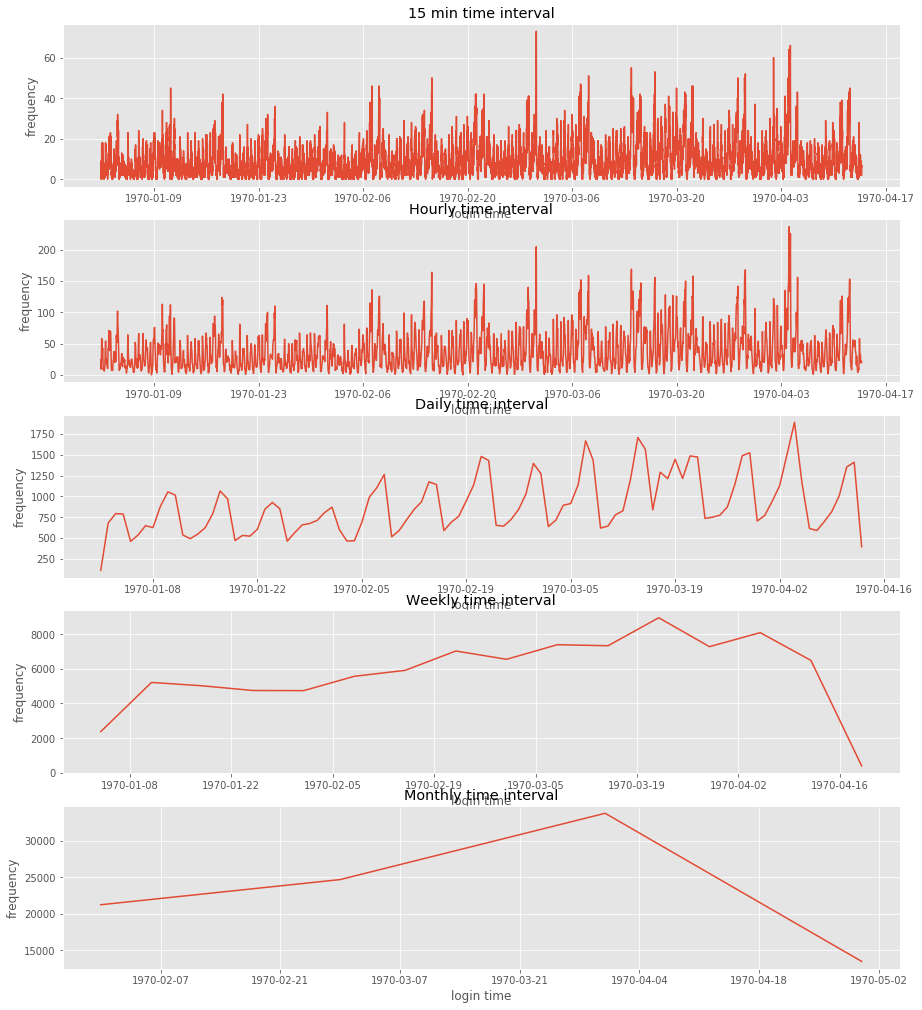

<Figure size 1080x504 with 0 Axes>

In [218]:
f, axs = plt.subplots(figsize=(15,15))
subplots_adjust(left=None, bottom=None, right=None, top=1,
                wspace=None, hspace=None)
plt.subplot(5,1,1)
plt.plot(quarter)
plt.ylabel('frequency')
plt.xlabel('login time')
plt.title('15 min time interval')

plt.subplot(5,1,2)
plt.plot(hourly)
plt.ylabel('frequency')
plt.xlabel('login time')
plt.title('Hourly time interval')


plt.subplot(5,1,3)
plt.plot(daily)
plt.ylabel('frequency')
plt.xlabel('login time')
plt.title('Daily time interval')


plt.subplot(5,1,4)
plt.plot(weekly)
plt.ylabel('frequency')
plt.xlabel('login time')
plt.title('Weekly time interval')


plt.subplot(5,1,5)
plt.plot(monthly)
plt.ylabel('frequency')
plt.xlabel('login time')
plt.title('Monthly time interval')
plt.figure(figsize=(15,7))

plt.show()

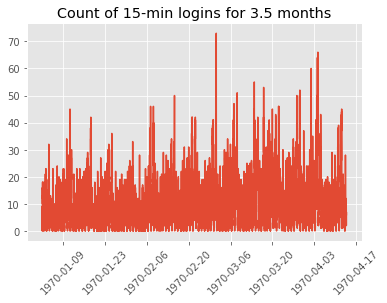

In [219]:
# 3.5 months
x = indexed_logins_15T['login_time']
y = indexed_logins_15T['count']
plt.plot(x, y)
plt.title('Count of 15-min logins for 3.5 months')
plt.xticks(rotation=45);

In [220]:
# tables for each month
jan = indexed_logins_15T[(indexed_logins_15T.login_time > '1970-01')
                           & (indexed_logins_15T.login_time < '1970-02')]
feb = indexed_logins_15T[(indexed_logins_15T.login_time > '1970-02')
                           & (indexed_logins_15T.login_time < '1970-03')]
mar = indexed_logins_15T[(indexed_logins_15T.login_time > '1970-03')
                           & (indexed_logins_15T.login_time < '1970-04')]
apr = indexed_logins_15T[(indexed_logins_15T.login_time > '1970-04')
                           & (indexed_logins_15T.login_time < '1970-05')]

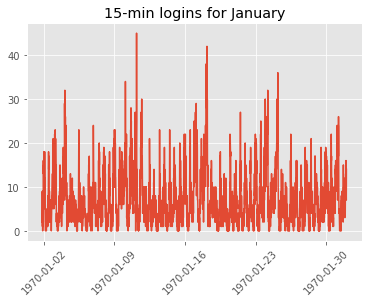

In [221]:
# January
x = jan['login_time']
y = jan['count']
plt.plot(x, y)
plt.title('15-min logins for January')
plt.xticks(rotation=45);

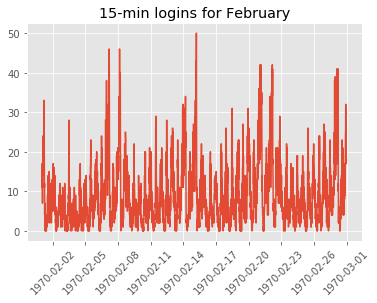

In [222]:
# February
x = feb['login_time']
y = feb['count']
plt.plot(x, y)
plt.title('15-min logins for February')
plt.xticks(rotation=45);

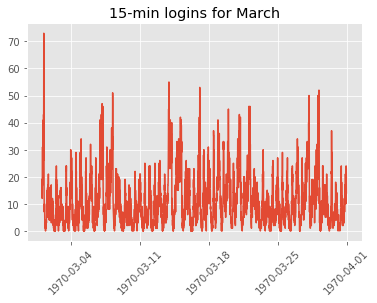

In [223]:
# March
x = mar['login_time']
y = mar['count']
plt.plot(x, y)
plt.title('15-min logins for March')
plt.xticks(rotation=45);

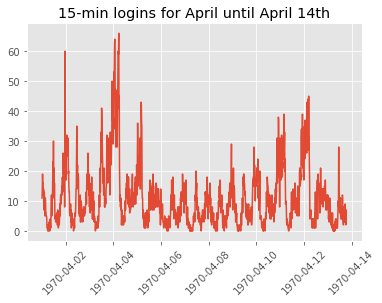

In [224]:
# April
x = apr['login_time']
y = apr['count']
plt.plot(x, y)
plt.title('15-min logins for April until April 14th')
plt.xticks(rotation=45);

In [225]:
# Counting of logins on weekdays with 0 = Monday, 6 = Sunday
indexed_logins_15T['weekday'] = indexed_logins_15T[
    'login_time'].dt.dayofweek
wkday_Mon_Sun = indexed_logins_15T.sort_values(by='count', ascending=False)
wkday_Mon_Sun_counts = wkday_Mon_Sun[['count', 'weekday']]
wkday_Mon_Sun_count = wkday_Mon_Sun_counts.groupby('weekday').sum().reset_index()
wkday_Mon_Sun_count

,weekday,count
0,0,8823
1,1,9268
2,2,10339
3,3,11960
4,4,15208
5,5,19377
6,6,18167


Text(0.5,1,'Logins vs. Weekday_Mon_Sun')

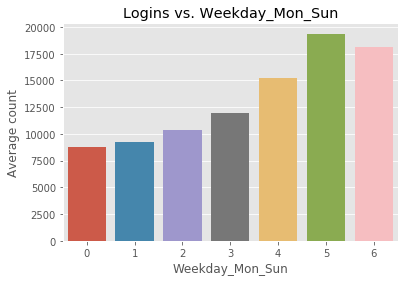

In [226]:
# Visualizing count of logins vs. weekday
sns.barplot(x='weekday', y='count', data=wkday_Mon_Sun_count)
plt.ylabel('Average count')
plt.xlabel('Weekday_Mon_Sun')
plt.title('Logins vs. Weekday_Mon_Sun')

In [227]:
# hourly counts
indexed_logins_15T['hour'] = indexed_logins_15T[
    'login_time'].dt.hour
hours = indexed_logins_15T
hour = hours[['count', 'hour']]
hour = hour.groupby('hour').sum().reset_index()
hour.head()

,hour,count
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034


Text(0.5,1,'Average logins vs. Hour of the day')

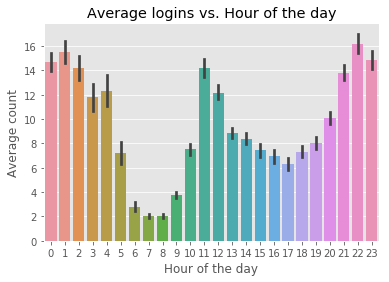

In [228]:
# logins per hour each day
sns.barplot(x='hour', y='count', data=hours)
plt.ylabel('Average count')
plt.xlabel('Hour of the day')
plt.title('Average logins vs. Hour of the day')

In [229]:
# 15 minute intervals
indexed_logins_15T['15_minute'] = indexed_logins_15T[
    'login_time'].dt.minute
minutes = indexed_logins_15T
minute = minutes[['count', '15_minute']]
minute = minute.groupby('15_minute').sum().reset_index()
minute

,15_minute,count
0,0,22660
1,15,22975
2,30,23962
3,45,23545


Text(0.5,1,'Average count of logins per 15 minutes intervals')

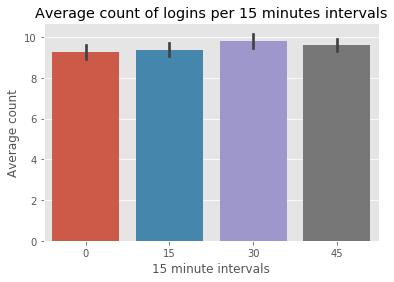

In [230]:
# logins per 15 minutes
sns.barplot(x='15_minute', y='count', data=minutes)
plt.ylabel('Average count')
plt.xlabel('15 minute intervals')
plt.title('Average count of logins per 15 minutes intervals')

## Conclusions
* Logins increase and peak over the weekend.
* Logins increase during lunch time and late-night to early morning.

# Part 2 ‑ Experiment and metrics design

* The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

* What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
* Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. 
* Please provide details on:
  * how you will implement the experiment
  * what statistical test(s) you will conduct to verify the significance of the observation
  * how you would interpret the results and provide recommendations to the city operations team along with any caveats.
  

## Solution and recommendationss

The Ultimate managers of city would want more driver partners to be available in both cities so as to:

* To increase driver/rider acceptance-rates
* To increase driver/rider sign-ups
* To reduce driver/rider wait times
* To increase profit

* A key measure of success in the experiment to encourage driver partners to serve in both cities by eliminating fees would be to measure the number of partner drivers. 
* Run an A/B test by randomly selecting a sample of the drivers to participate.
* A paired t-test can be used to determine if there was an impact (as long as there are 30 data points in the set). The number of partner drivers would be compared before and after the fees were eliminated. 
* An alternative test would be to do a two sample t-test on the mean number of trips before and after the fees were eliminated. 
* The null hypothesis for the test would be that the two are equal. Based off the results from either of the two t-tests I'll recommend continuing or discontinuing the fee reimbusement program.

# Part 3- Predictive modeling¶
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).


Data description
* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYY MM DD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [254]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [255]:
# Import json and read data into dataframe
import json

file = open(r'C:\Users\paro\Desktop\Ultimate_challenge\ultimate_data_challenge.json')
Data = pd.DataFrame(json.load(file))
file.close()
Data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [256]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [257]:
Data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [258]:
#Convert variables to date time objects
Data['last_trip_date'] = pd.to_datetime(Data['last_trip_date'])
Data['signup_date'] = pd.to_datetime(Data['signup_date'])

Data.loc[Data['last_trip_date'] >= '2014-06-01', 'active'] = 1
Data.loc[Data['last_trip_date'] < '2014-06-01', 'active'] = 0

Data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


## Visualization

We want to visualize the data distribution to check if our model depends on a certain feature to increase retention rate, and to see if improvements could be made or not. We want to visualize the relationship of 'trips in first 30 days' with other features.

In [259]:
trips_city = (Data[['trips_in_first_30_days', 'city', 'phone']].groupby('city').sum().reset_index())
trips_city

,city,trips_in_first_30_days
0,Astapor,32219
1,King's Landing,24957
2,Winterfell,56734


Text(0.5,1,'Total trips per city in first 30 Days')

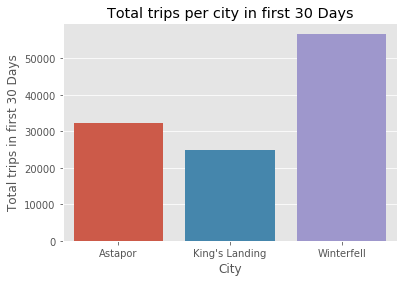

In [260]:
# Constructing barplot
sns.barplot(x='city', y='trips_in_first_30_days', data=trips_city)
plt.ylabel('Total trips in first 30 Days')
plt.xlabel('City')
plt.title('Total trips per city in first 30 Days')

In [261]:
trips_phone= Data[['trips_in_first_30_days', 'city', 'phone']].groupby('phone').sum().reset_index()
trips_phone

,phone,trips_in_first_30_days
0,Android,29067
1,iPhone,83894


Text(0.5,1,'Total trips per phone type in first 30 Days')

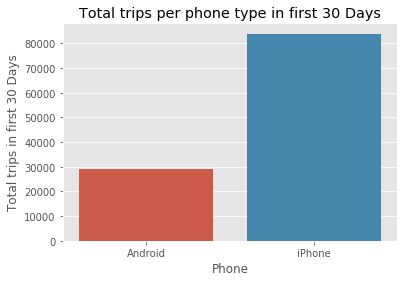

In [262]:
# Constructing barplot
sns.barplot(x='phone', y='trips_in_first_30_days', data=trips_phone)
plt.ylabel('Total trips in first 30 Days')
plt.xlabel('Phone')
plt.title('Total trips per phone type in first 30 Days')

In [263]:
# Getting trip date
Data[['last_trip_date']].max()

last_trip_date   2014-07-01
dtype: datetime64[ns]

In [264]:
# Active Users
len(Data[Data['last_trip_date'] >= '2014-06-01'])

18804

In [265]:
# Inactive users
len(Data[Data['last_trip_date'] < '2014-06-01'])

31196

In [266]:
# Total users
len(Data)

50000

In [267]:
# Taking the above into consideration into the Dataset
Data['retained'] = np.nan
Data.loc[Data['last_trip_date'] >= '2014-06-01', 'retained'] = 1
Data.loc[Data['last_trip_date'] < '2014-06-01', 'retained'] = 0
Data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0,0.0


In [268]:
# Retained users
Data['retained'].sum()/len(Data)

0.37608

In [269]:
# Dropping date-time features for predictive modeling
Data.drop('last_trip_date', axis=1, inplace=True)
Data.drop('signup_date', axis=1, inplace=True)

In [270]:
y = Data['retained'].values
Data = Data.drop('retained', axis=1)
Data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4,0.0


In [271]:
# One-hot-encode all categorical features
Data_encoded = pd.get_dummies(Data, columns = ['city', 'phone', 'ultimate_black_user'])
Data_encoded.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1.0,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1.0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0.0,0,0,1,1,0,1,0


In [272]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active                    50000 non-null float64
dtypes: bool(1), float64(7), int64(1), object(2)
memory usage: 3.9+ MB


In [273]:
# Setting X set into values
X = Data_encoded.values

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [275]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [289]:
file = open(r'C:\Users\paro\Desktop\Ultimate_challenge\ultimate_data_challenge.json')
Data = pd.DataFrame(json.load(file))
file.close()

In [290]:
Data.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [291]:
# Impute in missing values
Data['avg_rating_by_driver'].fillna(Data['avg_rating_by_driver'].mean(), inplace=True)
Data['avg_rating_of_driver'].fillna(Data['avg_rating_of_driver'].mean(), inplace=True)
Data['phone'].fillna('iPhone', inplace=True)

In [292]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [293]:
#Convert variables to date time objects
Data['last_trip_date'] = pd.to_datetime(Data['last_trip_date'])
Data['signup_date'] = pd.to_datetime(Data['signup_date'])

Data.loc[Data['last_trip_date'] >= '2014-06-01', 'active'] = 1
Data.loc[Data['last_trip_date'] < '2014-06-01', 'active'] = 0

Data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


In [294]:
#Reset index
Data.reset_index(inplace=True)

In [295]:
Data.describe()

,index,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,0.376080
std,14433.901067,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503,0.484405
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12499.750000,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,0.000000
50%,24999.500000,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000,0.000000
75%,37499.250000,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,1.000000
max,49999.000000,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


In [296]:
# Convert objects to dates
Data['last_trip_date'] = pd.to_datetime(Data['last_trip_date'])
Data['signup_date'] = pd.to_datetime(Data['signup_date'])

In [297]:
Data.head()

,index,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


In [298]:
# dummy variables for city and phone
city = pd.get_dummies(Data.city)
Data = Data.join(city)

phone = pd.get_dummies(Data.phone)
Data = Data.join(phone)

In [299]:
dummies = pd.get_dummies(Data['ultimate_black_user']).rename(columns=lambda x: 'ultimate_black_user_' + str(x))
Data = pd.concat([Data, dummies], axis=1)
Data = Data.drop(['ultimate_black_user'], axis=1)
Data.head()

,index,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,active,Astapor,King's Landing,Winterfell,Android,iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,46.2,1.0,0,1,0,0,1,0,1
1,1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,50.0,0.0,1,0,0,1,0,1,0
2,2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,100.0,0.0,1,0,0,0,1,1,0
3,3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,80.0,1.0,0,1,0,0,1,0,1
4,4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,82.4,0.0,0,0,1,1,0,1,0


In [300]:
#Drop all category dupes
Data.drop('last_trip_date', axis=1, inplace=True)

In [301]:
Data.drop(['signup_date'],axis = 1, inplace=True)

In [302]:
Data.drop(['phone'],axis = 1, inplace=True)

In [303]:
Data.drop(['city'],axis = 1, inplace=True)

In [304]:
Data.drop(['index'],axis = 1, inplace=True)

In [305]:
Data.drop(['surge_pct'],axis = 1, inplace=True)

In [306]:
Data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,trips_in_first_30_days,weekday_pct,active,Astapor,King's Landing,Winterfell,Android,iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,4,46.2,1.0,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0,50.0,0.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,3,100.0,0.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,9,80.0,1.0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,14,82.4,0.0,0,0,1,1,0,1,0


In [307]:
Data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,trips_in_first_30_days,weekday_pct,active,Astapor,King's Landing,Winterfell,Android,iPhone,ultimate_black_user_False,ultimate_black_user_True
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000
mean,5.796827,4.778158,4.601559,1.074764,2.278200,60.926084,0.376080,0.330680,0.202600,0.466720,0.300440,0.699560,0.62292,0.37708
std,5.707357,0.445753,0.564977,0.222336,3.792684,37.081503,0.484405,0.470463,0.401941,0.498896,0.458454,0.458454,0.48466,0.48466
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,3.880000,5.000000,4.700000,1.000000,1.000000,66.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.00000
75%,6.940000,5.000000,5.000000,1.050000,3.000000,100.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.00000
max,160.960000,5.000000,5.000000,8.000000,125.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [308]:
#Variables for model
X = Data.drop(['active'], axis=1)
y = Data['active']

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Predictive Model: Decision Tree Classifier

In [310]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [311]:
#Prediction for Decision Tree classifier
y_pred = clf_gini.predict(X_test)

In [312]:
#features = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver', 'avg_surge', 'city' ,'phone', 
#            'trips_in_first_30_days', 'ultimate_black_user','weekday_pct' ]
features = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver', 'avg_surge','trips_in_first_30_days', 
            'ultimate_black_user','weekday_pct','Astapor','Kings_Landing','Winterfell','Android','iPhone',
            'ultimate_black_user_False','ultimate_black_user_True']

In [313]:
gini_importances = clf_gini.feature_importances_
indices = np.argsort(gini_importances)[::-1]


# Print the feature ranking
print("Feature ranking:")


for i, val in enumerate(clf_gini.feature_importances_):
    print("{:20}{:3f}".format(features[i], val))

Feature ranking:
avg_dist            0.000502
avg_rating_by_driver0.499161
avg_rating_of_driver0.000000
avg_surge           0.051485
trips_in_first_30_days0.023982
ultimate_black_user 0.024320
weekday_pct         0.022698
Astapor             0.214166
Kings_Landing       0.000000
Winterfell          0.030870
Android             0.085491
iPhone              0.047325
ultimate_black_user_False0.000000


## Performance of Decision Tree Classifier

In [314]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
print('Confusion matrix for Decision Tree Classifier with criterion gini index')
print(confusion_matrix(y_test, y_pred))

Confusion matrix for Decision Tree Classifier with criterion gini index
[[5486  713]
 [1717 2084]]


In [315]:
print('Test accuracy of Decision Tree Classifier: '+str(accuracy_score(y_test, y_pred)))

Test accuracy of Decision Tree Classifier: 0.757


In [316]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82      6199
         1.0       0.75      0.55      0.63      3801

    accuracy                           0.76     10000
   macro avg       0.75      0.72      0.73     10000
weighted avg       0.76      0.76      0.75     10000



In [317]:
#Import models
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [318]:
#Import models
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [319]:
#Variables for model
X = Data.drop(['active'], axis=1)
y = Data['active']

In [320]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [321]:
#Random Over-Sampling
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_resampled).items()))

[(0.0, 24946), (1.0, 15054)]
[(0.0, 24946), (1.0, 24946)]


## Predictive Model: Logistic Regression & Performance

In [322]:
clf_log = LogisticRegression()
clf_log.fit(X_resampled, y_resampled)

y_pred_log = clf_log.predict(X_test)

print('Confusion matrix for Logistic Regression')
print(confusion_matrix(y_test, y_pred_log))

print('Test accuracy of Logistic Regression: '+str(accuracy_score(y_test, y_pred_log)))

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix for Logistic Regression
[[4574 1676]
 [1283 2467]]
Test accuracy of Logistic Regression: 0.7041


In [323]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

         0.0       0.78      0.73      0.76      6250
         1.0       0.60      0.66      0.63      3750

    accuracy                           0.70     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.71      0.70      0.71     10000



In [324]:
#Variables for model
X = Data.drop(['active'], axis=1)
y = Data['active']

In [325]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [326]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_resampled).items()))

[(0.0, 24922), (1.0, 15078)]
[(0.0, 24922), (1.0, 24922)]


## Predictive Model: Performance of Random Forest Classifier

In [327]:
from sklearn.neighbors import KNeighborsClassifier
rf = RandomForestClassifier(n_estimators=10, min_samples_split=2)

rf_result = rf.fit(X_resampled,y_resampled)

rf_pred = rf_result.predict(X_test)
accuracy = accuracy_score(y_test,rf_pred)
print('Test accuracy of Random Forest Classifier: '+str(accuracy))

Test accuracy of Random Forest Classifier: 0.743


In [328]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, rf_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

[[5024 1250]
 [1320 2406]]
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80      6274
         1.0       0.66      0.65      0.65      3726

    accuracy                           0.74     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.74      0.74      0.74     10000



## Results

* Decision Tree Classifiers performed the best with an accuracy score of 76 and F1 score of 82 percent. 
* Random forest classifiers performed next best score with an accurary score of 74 and a F1 score of 80 percent. 
* Logistic regression came in last with a accuracy of 70 percent and F1 score of 76 percent.
* The average rating of the driver was the highest determining feature at 50 percent for being active.
* The city of Astapor was the second more important feature at 21 percent. 
* Android users were the third most important feature at 8 percent.

The above might lead to important tests to improve results.